### Testing Trajectories

Magnitude of effects of the different code aspects, including the plasma flow turning, the charging up of the dust, and the magnetic field phase. 

In [ ]:
using Pkg
using TOML 
using LinearAlgebra
using DifferentialEquations
using Random
using Plots
using Interpolations 

In [2]:
include(joinpath(@__DIR__, "..", "src", "utils.jl"))
include(joinpath(@__DIR__, "..", "src", "constants.jl"))
include(joinpath(@__DIR__, "..", "src", "magnetic_field.jl"))
include(joinpath(@__DIR__, "..", "src", "plasma_field.jl"))
include(joinpath(@__DIR__, "..", "src", "plotting.jl"))
include(joinpath(@__DIR__, "..", "src", "charging.jl"))
include(joinpath(@__DIR__, "..", "src", "trajectory.jl")) 

EqMotionContinuous! (generic function with 1 method)

In [3]:
using JLD2, FileIO
data = load(joinpath(@__DIR__, "..", "data", "charging_dict.jld2"))
charging_dict = data["charging_dict"]

Dict{Any, Any} with 3 entries:
  "silicate"     => Dict{Any, Any}(50=>Dict{Any, Any}("Heliosheath"=>Dict{Any, …
  "carbonaceous" => Dict{Any, Any}(50=>Dict{Any, Any}("Heliosheath"=>Dict{Any, …
  "metadata"     => Dict{String, Vector}("materials"=>["silicate", "carbonaceou…

Load in parameters 

In [5]:
input_file = joinpath(@__DIR__, "..", "main", "input_values.toml")
input_parameters = load_parameters(input_file) 

println("=== Input Parameters === \n") 
pretty_print_table(input_parameters)  
println("\n")

=== Input Parameters === 

particle_size = 50                                            n_grid = 20                                                 
distance_TS = 1.1967829656e13                                 charging_type = continuous                                  
plasma_model = turning_turning                                q_over_m_value = 16.0                                       
beta_angle = 0.0                                              B_mag_ISM = 6.0e-10                                         
mode = full                                                   distance_Approach = 2.2439680605e12                         
dt = 7000.0                                                   particle_type = silicate                                    
alpha_angle = 180.0                                           plane = both                                                
plot_color = speed                                            plot_vectors = true                               

Analyse trajectories over changing conditions 

In [8]:
input_parameters["plasma_model"] = "straight_straight" #"turning_turning" 
input_parameters["particle_type"] = "silicate"

input_parameters["r0"] = [ 110.0, 0.0, 35.0 ] .* AU  
input_parameters["B_field_time_offset"] = (7.0 + 2.0) * yr 

input_parameters["particle_size"] = 20 #50
input_parameters["particle_type"] = "silicate"

input_parameters["charging_type"] = "instant" #"instant" #"constant" #"continuous"

v_calculated = voltage_at_size(charging_dict, input_parameters["particle_type"], "TerminationShock", input_parameters["particle_size"])
rho = input_parameters["particle_type"] == "carbonaceous" ? 2.5 : 3.3 
input_parameters["q_over_m_value"] = calculate_qm(v_calculated, input_parameters["particle_size"], rho) # Only relevant for constant charge. 

input_parameters["dt"] = 50_000
input_parameters["max_time"] = 7.0 * yr 

2.209032e8

In [9]:
res_traj, saved_charges = ComputeTrajectory(input_parameters); 

Affect triggered at 100.0 AU. New Q/m of 281.322
Affect triggered at 100.0 AU. New Q/m of 27.569
--- Solution Characteristics ---
Integration time: 0.0 → 7.0 years
Solution size: (6, 4423)


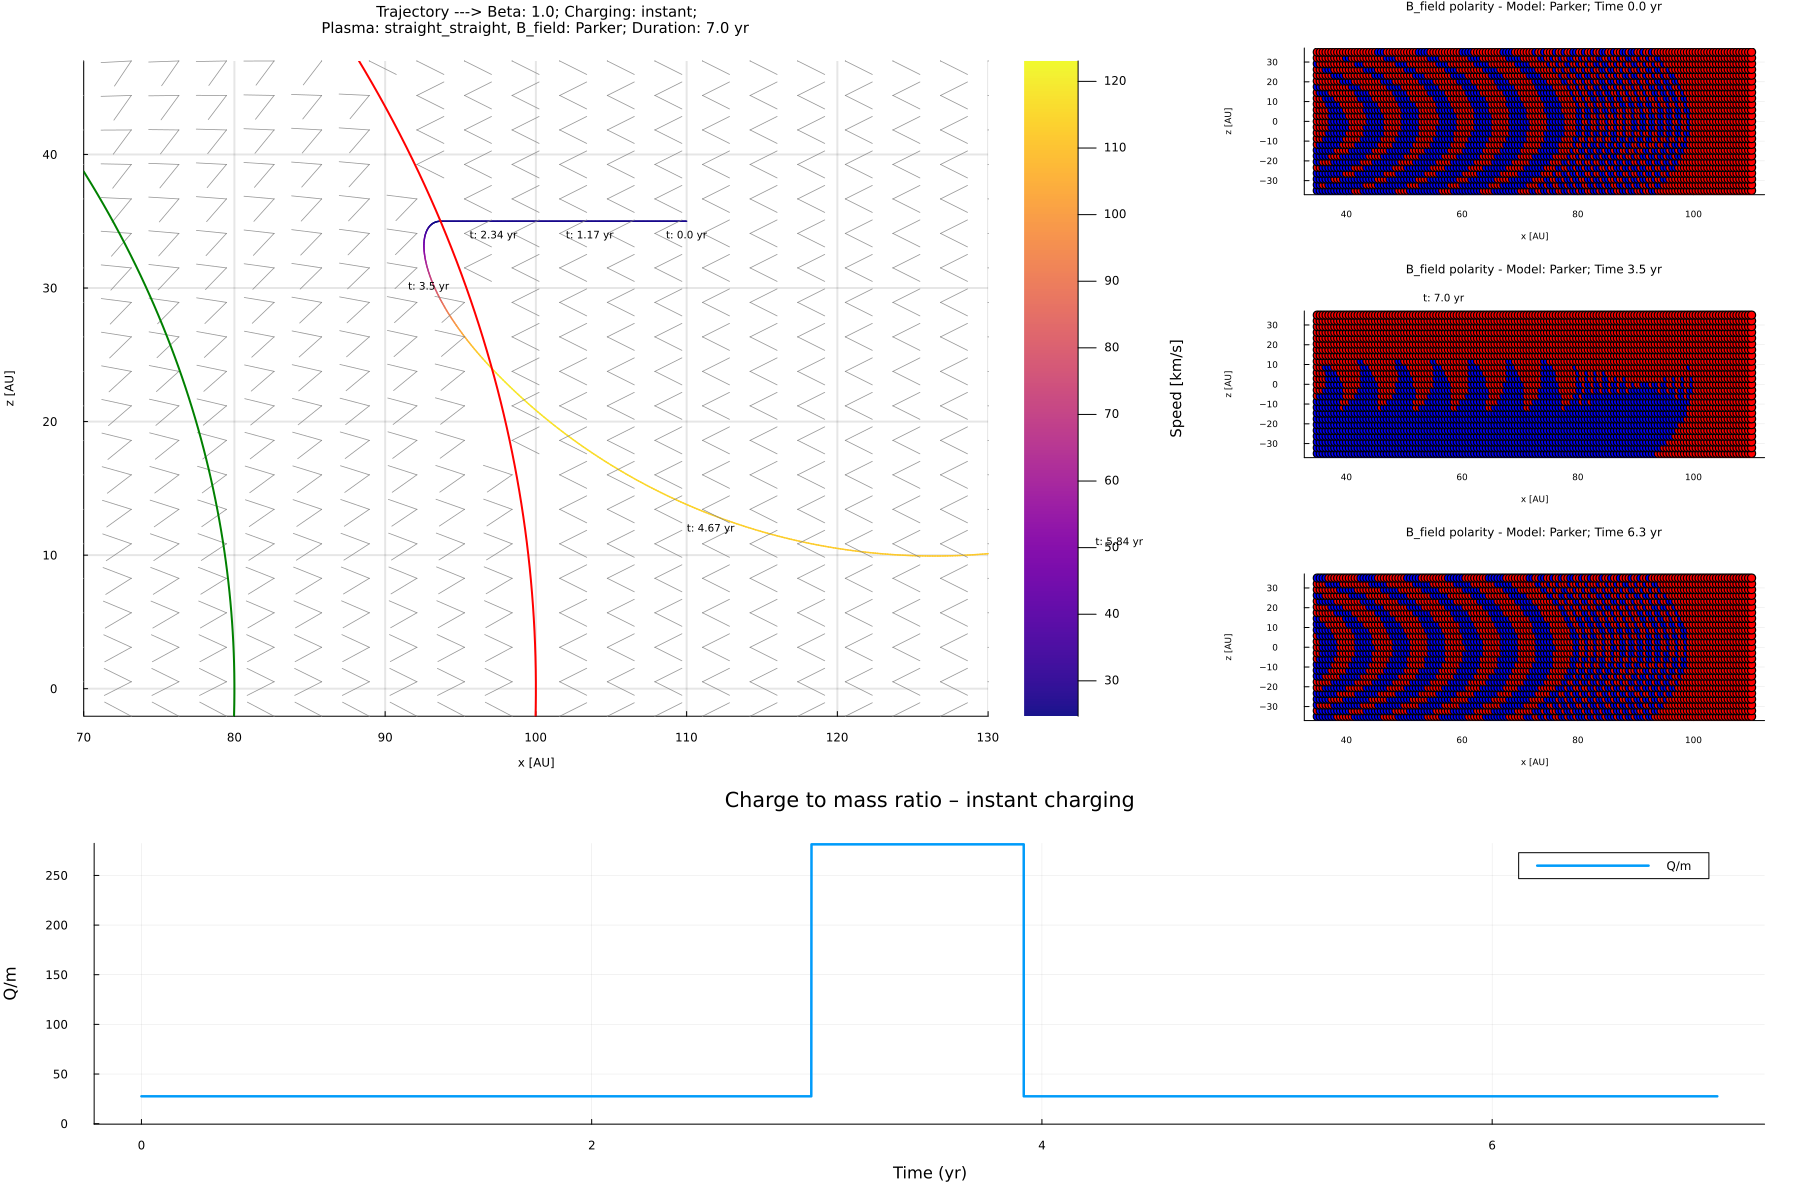

In [140]:
Plotter(res_traj, input_parameters; plot_B_fields=true, charges=saved_charges) 